In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc

In [ ]:
#Falls

In [5]:
monthly_falls = pd.read_csv("medicare_monthly_falls.csv")

In [6]:
monthly_falls.head()

,month_count,fipscounty,date
0,NaN,1001,2010-01
1,14.0,1001,2011-01
2,NaN,1001,2012-01
3,NaN,1001,2013-01
4,NaN,1001,2014-01


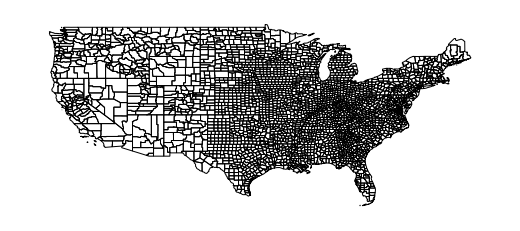

In [2]:
# plotting 
#https://python-graph-gallery.com/choropleth-map-geopandas-python

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));

In [3]:
def grouped_county_df(df):
    """
    Groups number of falls by county, multiple index
    """
    #reset index and drop duplicates
    grouped_df = df.set_index(['fipscounty', 'date'], inplace=False)
    unique_month_falls = grouped_df[~grouped_df.index.duplicated(keep='first')]
    return unique_month_falls

In [6]:
grouped_falls = grouped_county_df(monthly_falls)

In [4]:
def plot_fall_counts(grouped_df, var_name, US_map, title): 
    """
    Plots the grouped_df on a US_map from GeoData
    """
    total_month_counts = grouped_df.groupby(['fipscounty']).sum()
    plot_data = US_map.merge(total_month_counts, left_on=['id'], right_on=['fipscounty'])
    
    
    #plot 
    # Initialize the figure
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))

    # Set up the color sheme:
    scheme = mc.Quantiles(plot_data[var_name], k=10)

    # Map
    gplt.choropleth(plot_data, 
        hue=var_name, 
        linewidth=.1,
        scheme=scheme, cmap='Greens',
        legend=True,
        edgecolor='black',
        ax=ax
    );

    ax.set_title(title, fontsize=13);

    

/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 7
  Warn("Warning: setting k to %d" % k_q, UserWarning)


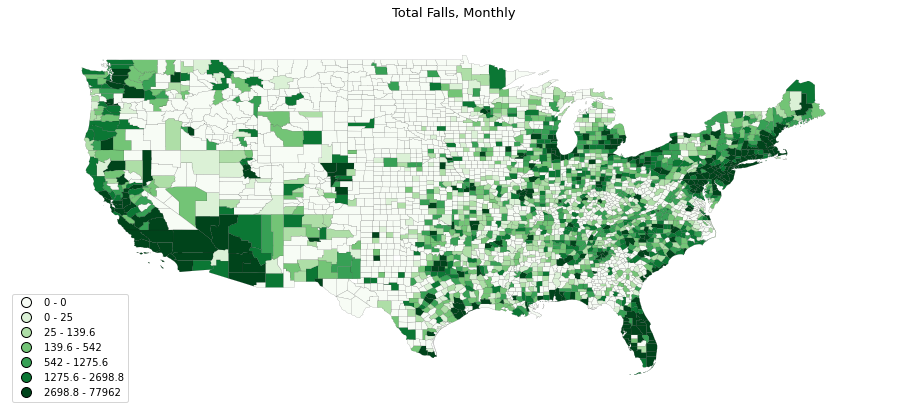

In [8]:
plot_fall_counts(grouped_falls, geoData, "Total Falls, Monthly")

In [7]:
#weather
weather = pd.read_pickle('monthly_weather_summary.pkl')

In [77]:
weather.head()

,FIPS,month_year,tavg_min,tavg_max,tavg_median,tavg_mean,tavg_std,tmin_min,tmin_max,tmin_median,...,pres_min,pres_max,pres_median,pres_mean,pres_std,tsun_min,tsun_max,tsun_median,tsun_mean,tsun_std
0,1001,2009-07,23.0,28.7,26.4,26.306897,1.427018,16.2,24.5,22.0,...,1008.7,1022.0,1016.30,1016.054167,2.961342,NaN,NaN,NaN,NaN,NaN
1,1001,2009-08,21.9,28.6,26.2,26.096552,1.591604,15.8,24.1,22.7,...,1012.2,1021.6,1016.85,1017.096429,2.036788,NaN,NaN,NaN,NaN,NaN
2,1001,2009-09,17.4,26.4,24.6,24.158621,2.024408,11.2,23.1,22.0,...,1011.9,1018.8,1016.75,1015.935714,2.193292,NaN,NaN,NaN,NaN,NaN
3,1001,2009-10,8.9,26.5,19.3,18.162069,4.860586,3.8,22.1,14.7,...,1008.3,1025.8,1015.85,1016.707143,4.409244,NaN,NaN,NaN,NaN,NaN
4,1001,2009-11,6.7,18.1,12.2,12.196552,2.732278,0.9,16.0,6.5,...,1011.7,1026.8,1019.90,1019.275000,3.990881,NaN,NaN,NaN,NaN,NaN


In [22]:
#ACS data - still in long format 
long_acs = pd.read_csv('ACS_variables_long.csv', index_col = 0)


In [25]:
long_acs.head()

,GEOID,variable,estimate
1,1001,B00001_001,3828.0
2,1003,B00001_001,10881.0
3,1005,B00001_001,3138.0
4,1007,B00001_001,1687.0
5,1009,B00001_001,5106.0


In [24]:
#maybe need error estimate later but for now, drop 
long_acs.drop(['NAME', 'moe'], inplace=True, axis=1)

In [30]:
len(long_acs)

524860

In [33]:
unique_acs = long_acs.drop_duplicates()

In [34]:
len(unique_acs)

521640

In [35]:
#pivot 
acs = unique_acs.pivot(index='GEOID', columns='variable', values='estimate')

In [36]:
acs.head()

variable,B00001_001,B01001A_014,B01001A_015,B01001A_016,B01001A_029,B01001A_030,B01001A_031,B01001B_014,B01001B_015,B01001B_016,...,B23026_040,B23026_041,B23026_042,B23026_043,B23026_044,B23026_045,B23026_046,B23026_047,B23026_048,B23026_049
GEOID,,,,,,,,,,,,,,,,,,,,,
1001,3828.0,1677.0,818.0,210.0,2002.0,1090.0,326.0,264.0,49.0,44.0,...,6.0,38.0,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0
1003,10881.0,8886.0,4632.0,1230.0,9765.0,4977.0,2122.0,470.0,195.0,36.0,...,65.0,141.0,480.0,120.0,0.0,77.0,82.0,31.0,170.0,15847.0
1005,3138.0,784.0,371.0,89.0,843.0,430.0,225.0,325.0,136.0,39.0,...,0.0,31.0,40.0,0.0,0.0,0.0,5.0,0.0,35.0,2130.0
1007,1687.0,758.0,348.0,56.0,859.0,482.0,180.0,199.0,42.0,22.0,...,0.0,22.0,35.0,10.0,0.0,0.0,0.0,0.0,25.0,1451.0
1009,5106.0,2552.0,1208.0,241.0,2884.0,1534.0,548.0,19.0,5.0,0.0,...,48.0,1.0,62.0,62.0,0.0,0.0,0.0,0.0,0.0,4423.0


In [37]:
acs.to_csv("ACS_wide.csv")

In [8]:
acs = pd.read_csv('ACS_wide.csv')

In [9]:
acs.head()

,GEOID,B00001_001,B01001A_014,B01001A_015,B01001A_016,B01001A_029,B01001A_030,B01001A_031,B01001B_014,B01001B_015,...,B23026_040,B23026_041,B23026_042,B23026_043,B23026_044,B23026_045,B23026_046,B23026_047,B23026_048,B23026_049
0,1001,3828.0,1677.0,818.0,210.0,2002.0,1090.0,326.0,264.0,49.0,...,6.0,38.0,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0
1,1003,10881.0,8886.0,4632.0,1230.0,9765.0,4977.0,2122.0,470.0,195.0,...,65.0,141.0,480.0,120.0,0.0,77.0,82.0,31.0,170.0,15847.0
2,1005,3138.0,784.0,371.0,89.0,843.0,430.0,225.0,325.0,136.0,...,0.0,31.0,40.0,0.0,0.0,0.0,5.0,0.0,35.0,2130.0
3,1007,1687.0,758.0,348.0,56.0,859.0,482.0,180.0,199.0,42.0,...,0.0,22.0,35.0,10.0,0.0,0.0,0.0,0.0,25.0,1451.0
4,1009,5106.0,2552.0,1208.0,241.0,2884.0,1534.0,548.0,19.0,5.0,...,48.0,1.0,62.0,62.0,0.0,0.0,0.0,0.0,0.0,4423.0


In [10]:
#total population 
#Male sex by age: B01001_020 - B01001_025
#Female sex by age: B01001_044 - B01001_049
acs['pop_65_up'] = acs['B01001_020'] + acs['B01001_021'] + acs['B01001_022'] + acs['B01001_023'] + acs['B01001_024'] + acs['B01001_025'] + acs['B01001_044'] + acs['B01001_045'] + acs['B01001_046'] + acs['B01001_047'] + acs['B01001_048'] + acs['B01001_049']

In [11]:
acs['pop_65_up']

0        7321.0
1       33782.0
2        4180.0
3        3209.0
4        9172.0
         ...   
3215     9075.0
3216     1701.0
3217     3189.0
3218     5424.0
3219     6656.0
Name: pop_65_up, Length: 3220, dtype: float64

## Merging

In [12]:
falls_weather = monthly_falls.merge(weather, left_on = 'fipscounty', right_on = 'FIPS', how = 'inner')

In [13]:
len(falls_weather['fipscounty'].unique())

3107

In [14]:
falls_weather.head()

,month_count,fipscounty,date,FIPS,month_year,tavg_min,tavg_max,tavg_median,tavg_mean,tavg_std,...,pres_min,pres_max,pres_median,pres_mean,pres_std,tsun_min,tsun_max,tsun_median,tsun_mean,tsun_std
0,NaN,1001,2010-01,1001,2009-07,23.0,28.7,26.4,26.306897,1.427018,...,1008.7,1022.0,1016.30,1016.054167,2.961342,NaN,NaN,NaN,NaN,NaN
1,NaN,1001,2010-01,1001,2009-08,21.9,28.6,26.2,26.096552,1.591604,...,1012.2,1021.6,1016.85,1017.096429,2.036788,NaN,NaN,NaN,NaN,NaN
2,NaN,1001,2010-01,1001,2009-09,17.4,26.4,24.6,24.158621,2.024408,...,1011.9,1018.8,1016.75,1015.935714,2.193292,NaN,NaN,NaN,NaN,NaN
3,NaN,1001,2010-01,1001,2009-10,8.9,26.5,19.3,18.162069,4.860586,...,1008.3,1025.8,1015.85,1016.707143,4.409244,NaN,NaN,NaN,NaN,NaN
4,NaN,1001,2010-01,1001,2009-11,6.7,18.1,12.2,12.196552,2.732278,...,1011.7,1026.8,1019.90,1019.275000,3.990881,NaN,NaN,NaN,NaN,NaN


In [15]:
len(falls_weather['FIPS'].unique())

3107

In [ ]:
#this crashes kernel for some reason - need to aggregate the acs data more 
full_df = falls_weather.merge(acs, left_on = 'FIPS', right_on = 'GEOID', how = 'inner')

In [47]:
full_df.head()

,month_count,fipscounty,date,FIPS,month_year,tavg_min,tavg_max,tavg_median,tavg_mean,tavg_std,...,B23026_041,B23026_042,B23026_043,B23026_044,B23026_045,B23026_046,B23026_047,B23026_048,B23026_049,pop_65_up
0,NaN,1001,2010-01,1001,2009-07,23.0,28.7,26.4,26.306897,1.414445,...,38.0,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0
1,NaN,1001,2010-01,1001,2009-08,21.9,28.6,26.2,26.096552,1.577580,...,38.0,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0
2,NaN,1001,2010-01,1001,2009-09,17.4,26.4,24.6,24.158621,2.006571,...,38.0,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0
3,NaN,1001,2010-01,1001,2009-10,8.9,26.5,19.3,18.162069,4.817761,...,38.0,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0
4,NaN,1001,2010-01,1001,2009-11,6.7,18.1,12.2,12.196552,2.708205,...,38.0,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0


In [ ]:
#Falls and Sociodemographics

In [54]:
falls_acs = monthly_falls.merge(acs, left_on = 'fipscounty', right_on = 'GEOID', how = 'inner')

In [59]:
falls_acs.head()

,month_count,fipscounty,date,B00001_001,B01001A_014,B01001A_015,B01001A_016,B01001A_029,B01001A_030,B01001A_031,...,B23026_042,B23026_043,B23026_044,B23026_045,B23026_046,B23026_047,B23026_048,B23026_049,pop_65_up,fall_rate
0,NaN,1001,2010-01,3828.0,1677.0,818.0,210.0,2002.0,1090.0,326.0,...,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0,NaN
1,14.0,1001,2011-01,3828.0,1677.0,818.0,210.0,2002.0,1090.0,326.0,...,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0,0.001912
2,NaN,1001,2012-01,3828.0,1677.0,818.0,210.0,2002.0,1090.0,326.0,...,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0,NaN
3,NaN,1001,2013-01,3828.0,1677.0,818.0,210.0,2002.0,1090.0,326.0,...,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0,NaN
4,NaN,1001,2014-01,3828.0,1677.0,818.0,210.0,2002.0,1090.0,326.0,...,255.0,35.0,0.0,0.0,180.0,0.0,40.0,3548.0,7321.0,NaN


In [58]:
len(falls_acs['fipscounty'].unique())

3106

In [57]:
falls_acs['fall_rate'] = falls_acs['month_count'] / falls_acs['pop_65_up']

In [60]:
falls_acs.to_pickle("falls_acs.pkl")

In [16]:
falls_acs = pd.read_pickle("falls_acs.pkl")

In [17]:
#small version to plot only rates now 
fall_rates = falls_acs[['fipscounty', 'date', 'fall_rate']]


In [18]:
fall_rates.head()

,fipscounty,date,fall_rate
0,1001,2010-01,NaN
1,1001,2011-01,0.001912
2,1001,2012-01,NaN
3,1001,2013-01,NaN
4,1001,2014-01,NaN


In [19]:
fall_rates['fall_rate_100000'] = fall_rates['fall_rate'] * 100000

/var/folders/gy/w5ghr6zn5jn84fzh3qwwsnbm0000gn/T/ipykernel_17039/4268585694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_rates['fall_rate_100000'] = fall_rates['fall_rate'] * 100000


In [20]:
fall_rates.head()

,fipscounty,date,fall_rate,fall_rate_100000
0,1001,2010-01,NaN,NaN
1,1001,2011-01,0.001912,191.230706
2,1001,2012-01,NaN,NaN
3,1001,2013-01,NaN,NaN
4,1001,2014-01,NaN,NaN


In [69]:
fall_rates_grouped = grouped_county_df(fall_rates)

In [70]:
fall_rates_grouped.head()

fall_rate  fall_rate_100000
fipscounty date                                
1001       2010-01        NaN               NaN
           2011-01   0.001912        191.230706
           2012-01        NaN               NaN
           2013-01        NaN               NaN
           2014-01        NaN               NaN

/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 7
  Warn("Warning: setting k to %d" % k_q, UserWarning)


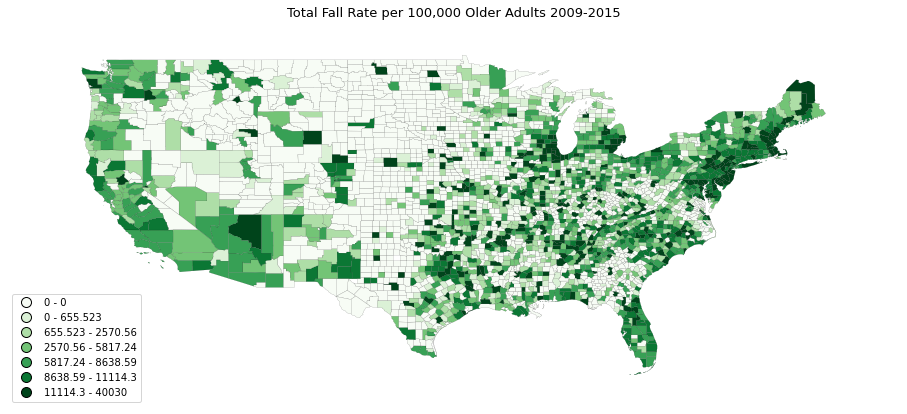

In [74]:
plot_fall_counts(fall_rates_grouped, 'fall_rate_100000', geoData, 'Total Fall Rate per 100,000 Older Adults 2009-2015')

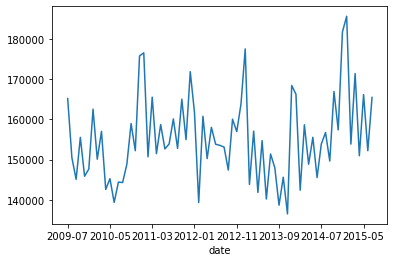

In [75]:
fall_rates_grouped['fall_rate_100000'].groupby(['date']).sum().plot();

In [22]:
# Fall rates and weather 
fall_rates.head()

,fipscounty,date,fall_rate,fall_rate_100000
0,1001,2010-01,NaN,NaN
1,1001,2011-01,0.001912,191.230706
2,1001,2012-01,NaN,NaN
3,1001,2013-01,NaN,NaN
4,1001,2014-01,NaN,NaN


In [23]:
weather.head()

,FIPS,month_year,tavg_min,tavg_max,tavg_median,tavg_mean,tavg_std,tmin_min,tmin_max,tmin_median,...,pres_min,pres_max,pres_median,pres_mean,pres_std,tsun_min,tsun_max,tsun_median,tsun_mean,tsun_std
0,1001,2009-07,23.0,28.7,26.4,26.306897,1.427018,16.2,24.5,22.0,...,1008.7,1022.0,1016.30,1016.054167,2.961342,NaN,NaN,NaN,NaN,NaN
1,1001,2009-08,21.9,28.6,26.2,26.096552,1.591604,15.8,24.1,22.7,...,1012.2,1021.6,1016.85,1017.096429,2.036788,NaN,NaN,NaN,NaN,NaN
2,1001,2009-09,17.4,26.4,24.6,24.158621,2.024408,11.2,23.1,22.0,...,1011.9,1018.8,1016.75,1015.935714,2.193292,NaN,NaN,NaN,NaN,NaN
3,1001,2009-10,8.9,26.5,19.3,18.162069,4.860586,3.8,22.1,14.7,...,1008.3,1025.8,1015.85,1016.707143,4.409244,NaN,NaN,NaN,NaN,NaN
4,1001,2009-11,6.7,18.1,12.2,12.196552,2.732278,0.9,16.0,6.5,...,1011.7,1026.8,1019.90,1019.275000,3.990881,NaN,NaN,NaN,NaN,NaN


In [24]:
fall_rates_weather = fall_rates.merge(weather, left_on = 'fipscounty', right_on = 'FIPS', how = 'inner')

In [25]:
fall_rates_weather.head()

,fipscounty,date,fall_rate,fall_rate_100000,FIPS,month_year,tavg_min,tavg_max,tavg_median,tavg_mean,...,pres_min,pres_max,pres_median,pres_mean,pres_std,tsun_min,tsun_max,tsun_median,tsun_mean,tsun_std
0,1001,2010-01,NaN,NaN,1001,2009-07,23.0,28.7,26.4,26.306897,...,1008.7,1022.0,1016.30,1016.054167,2.961342,NaN,NaN,NaN,NaN,NaN
1,1001,2010-01,NaN,NaN,1001,2009-08,21.9,28.6,26.2,26.096552,...,1012.2,1021.6,1016.85,1017.096429,2.036788,NaN,NaN,NaN,NaN,NaN
2,1001,2010-01,NaN,NaN,1001,2009-09,17.4,26.4,24.6,24.158621,...,1011.9,1018.8,1016.75,1015.935714,2.193292,NaN,NaN,NaN,NaN,NaN
3,1001,2010-01,NaN,NaN,1001,2009-10,8.9,26.5,19.3,18.162069,...,1008.3,1025.8,1015.85,1016.707143,4.409244,NaN,NaN,NaN,NaN,NaN
4,1001,2010-01,NaN,NaN,1001,2009-11,6.7,18.1,12.2,12.196552,...,1011.7,1026.8,1019.90,1019.275000,3.990881,NaN,NaN,NaN,NaN,NaN


In [26]:
len(fall_rates_weather['fipscounty'].unique())

3106

## Lasso Regression 

In [ ]:
#weather data 

In [57]:
len(fall_rates_weather)

14862184

In [59]:
fall_rates_weather.isnull().sum()

fipscounty                 0
date                       0
fall_rate            9601599
fall_rate_100000     9601599
FIPS                       0
month_year                 0
tavg_min              474908
tavg_max              474908
tavg_median           474908
tavg_mean             474908
tavg_std              721059
tmin_min               11289
tmin_max               11289
tmin_median            11289
tmin_mean              11289
tmin_std              260554
tmax_min               11362
tmax_max               11362
tmax_median            11362
tmax_mean              11362
tmax_std              260627
prcp_min             6050833
prcp_max             6050833
prcp_median          6050833
prcp_mean            6050833
prcp_std             6178133
snow_min            12299317
snow_max            12299317
snow_median         12299317
snow_mean           12299317
snow_std            12340844
wdir_min             3077630
wdir_max             3077630
wdir_median          3077630
wdir_mean     

In [ ]:
#remove the wdir, wspd, and tsun variables since so much missingness

In [94]:
small_fall_rates_weather = fall_rates_weather.drop(['fall_rate', 'FIPS', 'month_year', "wdir_min", "wdir_max", "wdir_median", "wdir_mean", "wdir_std",
                                                    "wpgt_min", "wpgt_max", "wpgt_median", "wpgt_mean", "wpgt_std",
                                                   "tsun_min", "tsun_max", "tsun_median", "tsun_mean", "tsun_std"], axis = 1, inplace = False)

In [95]:
small_fall_rates_weather.head()

,fipscounty,date,fall_rate_100000,tavg_min,tavg_max,tavg_median,tavg_mean,tavg_std,tmin_min,tmin_max,...,wspd_min,wspd_max,wspd_median,wspd_mean,wspd_std,pres_min,pres_max,pres_median,pres_mean,pres_std
0,1001,2010-01,NaN,23.0,28.7,26.4,26.306897,1.427018,16.2,24.5,...,2.3,8.4,5.4,5.417241,1.676107,1008.7,1022.0,1016.30,1016.054167,2.961342
1,1001,2010-01,NaN,21.9,28.6,26.2,26.096552,1.591604,15.8,24.1,...,1.3,16.5,4.2,5.251724,3.675364,1012.2,1021.6,1016.85,1017.096429,2.036788
2,1001,2010-01,NaN,17.4,26.4,24.6,24.158621,2.024408,11.2,23.1,...,0.9,11.6,7.7,7.172414,2.769850,1011.9,1018.8,1016.75,1015.935714,2.193292
3,1001,2010-01,NaN,8.9,26.5,19.3,18.162069,4.860586,3.8,22.1,...,1.1,16.1,7.6,7.758621,4.280397,1008.3,1025.8,1015.85,1016.707143,4.409244
4,1001,2010-01,NaN,6.7,18.1,12.2,12.196552,2.732278,0.9,16.0,...,0.5,29.5,3.5,6.241379,6.487379,1011.7,1026.8,1019.90,1019.275000,3.990881


In [64]:
small_fall_rates_weather.isnull().sum()

fipscounty                 0
date                       0
fall_rate_100000     9601599
tavg_min              474908
tavg_max              474908
tavg_median           474908
tavg_mean             474908
tavg_std              721059
tmin_min               11289
tmin_max               11289
tmin_median            11289
tmin_mean              11289
tmin_std              260554
tmax_min               11362
tmax_max               11362
tmax_median            11362
tmax_mean              11362
tmax_std              260627
prcp_min             6050833
prcp_max             6050833
prcp_median          6050833
prcp_mean            6050833
prcp_std             6178133
snow_min            12299317
snow_max            12299317
snow_median         12299317
snow_mean           12299317
snow_std            12340844
wspd_min              375091
wspd_max              375091
wspd_median           375091
wspd_mean             375091
wspd_std              623009
pres_min             5977600
pres_max      

In [65]:
#find a better way to deal with the missingness 
no_missing_data = small_fall_rates_weather.dropna()

In [66]:
len(no_missing_data)

1033977

In [87]:
import sklearn 
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



In [96]:
Y = no_missing_data['fall_rate_100000']

In [97]:
#remove date and location (FIPS)
X = no_missing_data.drop(['fall_rate_100000', 'date', 'fipscounty'], axis =1).astype('float64')

In [101]:
X

,tavg_min,tavg_max,tavg_median,tavg_mean,tavg_std,tmin_min,tmin_max,tmin_median,tmin_mean,tmin_std,...,wspd_min,wspd_max,wspd_median,wspd_mean,wspd_std,pres_min,pres_max,pres_median,pres_mean,pres_std
188240,21.7,28.8,25.80,25.690323,1.779017,15.0,23.3,21.1,20.370968,2.411389,...,4.0,13.7,7.20,7.890323,2.716782,1008.8,1022.2,1016.05,1015.879167,3.247739
188241,20.1,28.4,25.70,25.493548,1.951911,13.9,23.9,21.7,20.951613,2.288940,...,2.5,12.6,6.10,6.493548,2.517265,1014.1,1021.9,1017.65,1017.960000,1.806829
188242,16.1,25.7,23.65,23.213333,2.218532,9.4,22.8,20.6,19.726667,3.442126,...,2.2,14.8,6.80,7.166667,2.912320,1011.8,1019.7,1017.50,1016.784211,2.403068
188243,7.3,25.3,17.80,16.616129,4.556248,1.7,18.3,12.8,11.435484,5.081702,...,1.8,21.2,8.30,8.874194,4.855030,1008.7,1027.1,1018.10,1018.305263,4.734328
188244,5.6,17.5,11.65,11.656667,2.518029,-1.7,13.9,5.0,5.516667,3.572026,...,0.7,24.5,5.00,6.753333,5.010247,1013.9,1028.2,1020.60,1020.656000,3.767524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14817580,0.0,17.5,9.60,9.183871,3.856777,-2.7,9.4,2.8,2.880645,3.044056,...,7.2,34.6,13.70,15.432258,6.081359,1002.7,1025.2,1011.75,1012.795000,6.102931
14817581,14.7,24.1,19.40,19.150000,2.681835,7.8,14.4,9.7,9.960000,1.790704,...,8.3,19.8,12.95,13.150000,2.932311,1006.1,1019.6,1012.15,1012.087500,3.764515
14817582,14.5,25.3,21.40,20.551613,2.702329,2.2,13.9,10.6,10.400000,2.732154,...,8.3,28.4,13.00,15.767742,6.259946,1006.9,1021.9,1012.60,1013.166667,4.052634
14817583,11.6,26.1,20.70,20.416129,3.731407,-1.6,17.8,10.6,10.174194,4.390062,...,7.6,25.6,13.30,14.609677,5.209821,1003.9,1021.3,1013.50,1013.477419,3.567044


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [99]:
#standardizing will likely improve performance 

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test) 

In [102]:
#crossfold validation to find alpha 

weather_model = LassoCV(cv=5, random_state=42, max_iter=10000)

# Fit model
weather_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=42)

In [103]:
weather_model.alpha_

0.005796729580704915

In [104]:
lasso = Lasso(alpha=weather_model.alpha_)
lasso.fit(X_train, y_train)

/Users/jadebenson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.780e+08, tolerance: 3.038e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.005796729580704915)

In [107]:
lasso.coef_

array([  2.76158015,  10.91322596,  -8.92486541,   7.21038404,
       -20.51193684, -15.90142921,  -3.50352003,   9.80712384,
       -13.64031621,  10.59460554,   1.08475732,  -2.83812268,
        -4.54507348,  23.59417265,  13.17979853,   0.        ,
        -5.16120122,  -2.32345788,   0.84826592,  10.59561404,
        -0.61534071,   9.76566774,   1.73802559,  -5.85048976,
        -5.00867301,  -5.25550017,  -8.49890222,  -0.37405776,
         9.99486884,   3.45547198,   0.70837073,   2.69956613,
         3.90246052,   0.        ,  -0.40673981])

In [109]:
lasso_coefs_labels = list(zip(lasso.coef_, X))

In [110]:
lasso_coefs_labels

[(2.7615801512730047, 'tavg_min'),
 (10.913225958695048, 'tavg_max'),
 (-8.924865406423995, 'tavg_median'),
 (7.210384036861551, 'tavg_mean'),
 (-20.511936839942262, 'tavg_std'),
 (-15.901429211868297, 'tmin_min'),
 (-3.503520026097137, 'tmin_max'),
 (9.80712383943108, 'tmin_median'),
 (-13.64031620673723, 'tmin_mean'),
 (10.59460553903117, 'tmin_std'),
 (1.0847573247763078, 'tmax_min'),
 (-2.83812268043639, 'tmax_max'),
 (-4.545073476862089, 'tmax_median'),
 (23.594172645911804, 'tmax_mean'),
 (13.179798528165666, 'tmax_std'),
 (0.0, 'prcp_min'),
 (-5.161201218823972, 'prcp_max'),
 (-2.323457883423341, 'prcp_median'),
 (0.8482659238966228, 'prcp_mean'),
 (10.59561403613977, 'prcp_std'),
 (-0.6153407100508421, 'snow_min'),
 (9.765667741320234, 'snow_max'),
 (1.7380255859942402, 'snow_median'),
 (-5.850489759627609, 'snow_mean'),
 (-5.00867301477772, 'snow_std'),
 (-5.255500168172656, 'wspd_min'),
 (-8.498902223515977, 'wspd_max'),
 (-0.3740577649785065, 'wspd_median'),
 (9.994868841251

In [113]:
lasso_coefs_labels.sort(key=lambda tup: abs(tup[0]), reverse=True) 

In [114]:
lasso_coefs_labels
#interesting maximum temperature was most associated, positively 
#the greater the standard deviation in temp, falls decrease? 
#as the min temp increases, the fall risk decreases - makes sense!
#but differences in precipitation do lead to increased fall rates 


[(23.594172645911804, 'tmax_mean'),
 (-20.511936839942262, 'tavg_std'),
 (-15.901429211868297, 'tmin_min'),
 (-13.64031620673723, 'tmin_mean'),
 (13.179798528165666, 'tmax_std'),
 (10.913225958695048, 'tavg_max'),
 (10.59561403613977, 'prcp_std'),
 (10.59460553903117, 'tmin_std'),
 (9.994868841251117, 'wspd_mean'),
 (9.80712383943108, 'tmin_median'),
 (9.765667741320234, 'snow_max'),
 (-8.924865406423995, 'tavg_median'),
 (-8.498902223515977, 'wspd_max'),
 (7.210384036861551, 'tavg_mean'),
 (-5.850489759627609, 'snow_mean'),
 (-5.255500168172656, 'wspd_min'),
 (-5.161201218823972, 'prcp_max'),
 (-5.00867301477772, 'snow_std'),
 (-4.545073476862089, 'tmax_median'),
 (3.9024605150371583, 'pres_median'),
 (-3.503520026097137, 'tmin_max'),
 (3.455471984534341, 'wspd_std'),
 (-2.83812268043639, 'tmax_max'),
 (2.7615801512730047, 'tavg_min'),
 (2.6995661264114252, 'pres_max'),
 (-2.323457883423341, 'prcp_median'),
 (1.7380255859942402, 'snow_median'),
 (1.0847573247763078, 'tmax_min'),
 (0.8

In [74]:
#R squared score 
print('R squared training set', round(lasso.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))


R squared training set 3.46
R squared test set 3.41


In [116]:
#MSE 
# Training data
pred_train = lasso.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = lasso.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 4041.32
MSE test set 4084.74
